In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load your DataFrame
df = pd.read_csv('Processed_Data.csv') 

# Select relevant features and target variable
features = ["Date"]  # Only date is considered as the feature
target_variable = "HCHO Level"

# Prepare the data and train separate models for each location
locations = df['Location'].unique()
models = {}
results = {}

12/12 [==============================] - 0s 5ms/step


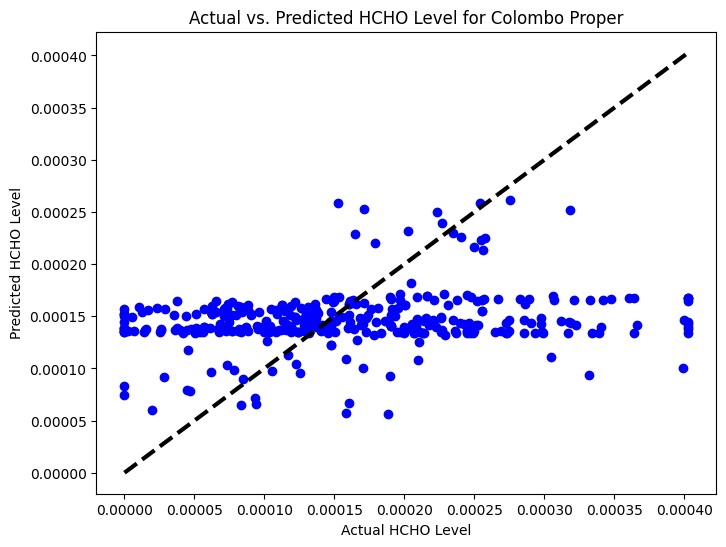

12/12 [==============================] - 0s 4ms/step


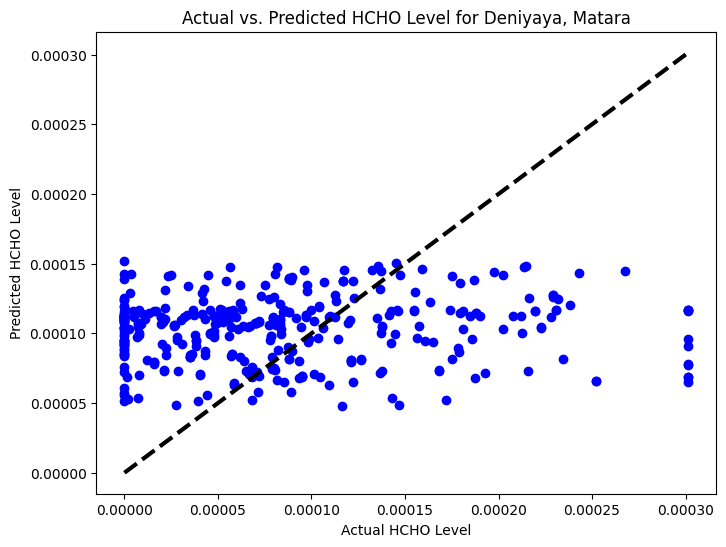

12/12 [==============================] - 0s 6ms/step


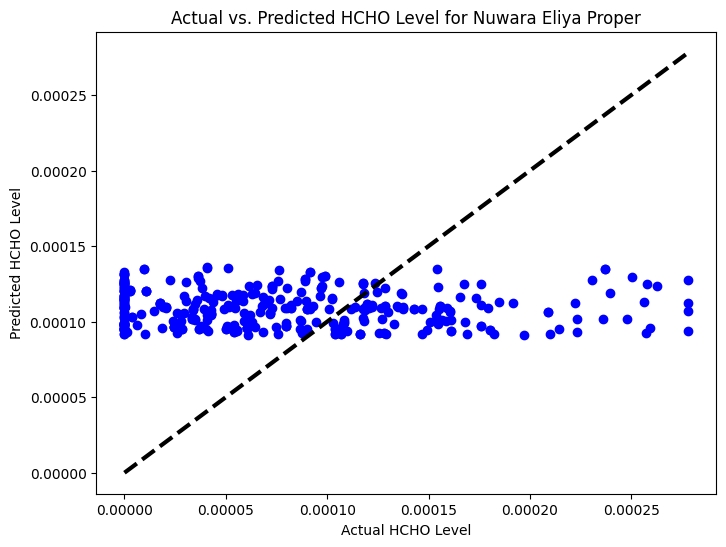

12/12 [==============================] - 0s 7ms/step


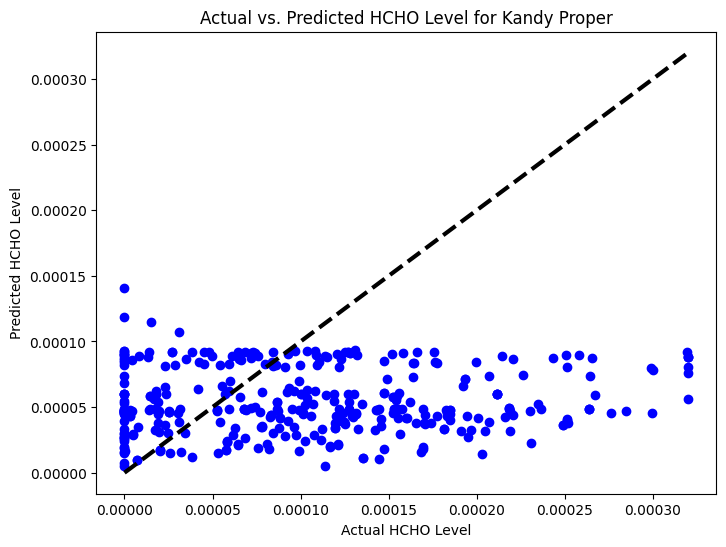

12/12 [==============================] - 0s 5ms/step


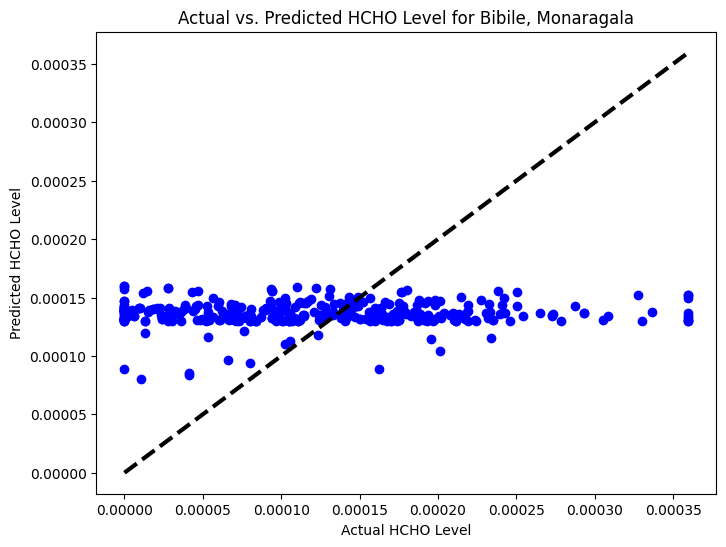

12/12 [==============================] - 0s 6ms/step


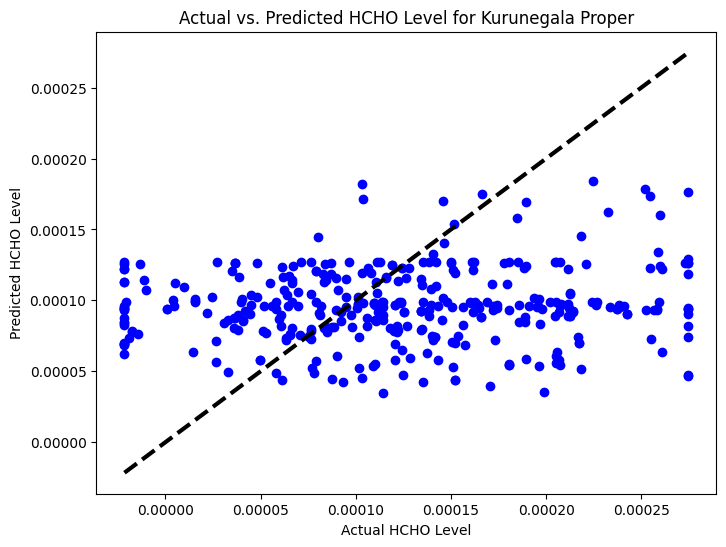

12/12 [==============================] - 0s 4ms/step


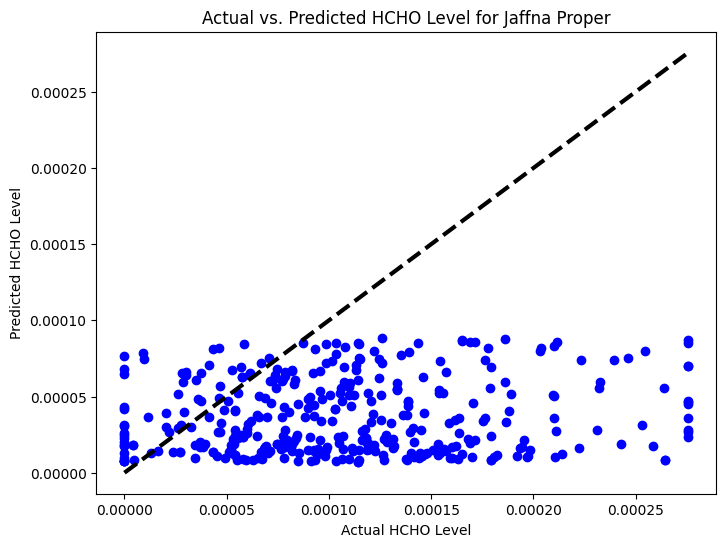

In [3]:
for location in locations:
    # Filter data for the current location
    location_data = df[df['Location'] == location]
    
    # Prepare the data
    X = pd.to_datetime(location_data[features]['Date']).astype('int64').values.reshape(-1, 1)  # Convert date to timestamp
    y = location_data[target_variable]

    # Scale the features
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Reshape the input data for LSTM model
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Define the LSTM model architecture
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(1, X_train.shape[2])))
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)  # Set verbose to 0 for less output

    # Store the trained model for the current location
    models[location] = model

    # Evaluate the model
    mse = model.evaluate(X_test, y_test, verbose=0)
    
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[location] = {'MSE': mse, 'R-squared': r2}

    # Plot actual vs. predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
    plt.xlabel('Actual HCHO Level')
    plt.ylabel('Predicted HCHO Level')
    plt.title(f'Actual vs. Predicted HCHO Level for {location}')
    plt.show()




In [4]:
# Printing results
for location, result in results.items():
    print(f"Location: {location}, MSE: {result['MSE']}, R-squared: {result['R-squared']}")

Location: Colombo Proper, MSE: 9.108172882577037e-09, R-squared: 0.02257037551929164
Location: Deniyaya, Matara, MSE: 6.441295052894702e-09, R-squared: -0.10575042596116746
Location: Nuwara Eliya Proper, MSE: 6.07160455246003e-09, R-squared: -0.29725131342227296
Location: Kandy Proper, MSE: 9.51428802409282e-09, R-squared: -0.42724569601964935
Location: Bibile, Monaragala, MSE: 7.929465972722483e-09, R-squared: -0.04107697689185419
Location: Kurunegala Proper, MSE: 7.116104594473427e-09, R-squared: -0.15665378849615408
Location: Jaffna Proper, MSE: 9.589467886428338e-09, R-squared: -1.188258348233647
